<font color='Sucees'> 
### <u>LEGEND</u>
<br />
<div class="alert alert-block alert-success">
<b>Acceptable:</b> Looks good to me (LGTM).
</div>
<div class="alert alert-block alert-danger">
<b>Needs rework:</b> The block needs to be reworked.
</div>
</font>

# Final Project: Analyzing Mobile App User Behavior

As a junior data analyst, figure out the impact that various events have on the completion of the events contacts_show or show_contacts. Then determine which events are most often completed by users who view contact info on the ad page.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from scipy import stats 
import statsmodels.stats.weightstats
import numpy as np
import math 

# Open data and analyze general data

Check the data using head/ tail/ sample in order to see if the data looks alright at a glance.

In [2]:
dataset = pd.read_csv('datasets/mobile_dataset_us.csv')
dataset

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [3]:
sources = pd.read_csv('datasets/mobile_sources_us.csv')
sources

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,bing
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,bing
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,bing
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,bing
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,bing


<div class="alert alert-block alert-success">
The data has been loaded, great.
</div>

# Data preprocessing

**Open mobile_dataset_us.csv and check the values of each variable, make sure it is consistent with the variable name**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
event.time    74197 non-null object
event.name    74197 non-null object
user.id       74197 non-null object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
dataset['event.time'] = pd.to_datetime(dataset['event.time'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
event.time    74197 non-null datetime64[ns]
event.name    74197 non-null object
user.id       74197 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [6]:
dataset['date'] = dataset['event.time'].dt.normalize()
dataset

,event.time,event.name,user.id,date
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902,2019-11-03
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03


**Open mobile_sources_us.csv and check the values of each variable, make sure it is consistent with the variable name.**

In [7]:
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
userId    4293 non-null object
source    4293 non-null object
dtypes: object(2)
memory usage: 67.2+ KB


**Rename variables as needed for easier use later.**

In [8]:
dataset.columns = ['event_time', 'event_name', 'user_id', 'date']
dataset

,event_time,event_name,user_id,date
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902,2019-11-03
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03


In [9]:
sources.columns = ['user_id','source']
sources

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,bing
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,bing
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,bing
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,bing
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,bing


**Check for missing/ duplicate values in either of the datasets.**

In [10]:
any(dataset.duplicated())

False

In [11]:
dataset.isnull().values.any()

False

In [12]:
any(sources.duplicated())

False

In [13]:
sources.isnull().values.any()

False

**Change show_contacts to contacts_show since they're essentially the same event.**

In [14]:
#Replace show_contacts with contacts_show
dataset['event_name'] = dataset['event_name'].replace(['show_contacts'],'contacts_show')

#Check if changes went through
dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

<div class="alert alert-block alert-success">
Ok, agreed.
</div>

# Exploratory Data Analysis

**For the mobile_dataset_us.csv dataset, make a graph to see the relationship between event_time and user_id**

In [15]:
dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



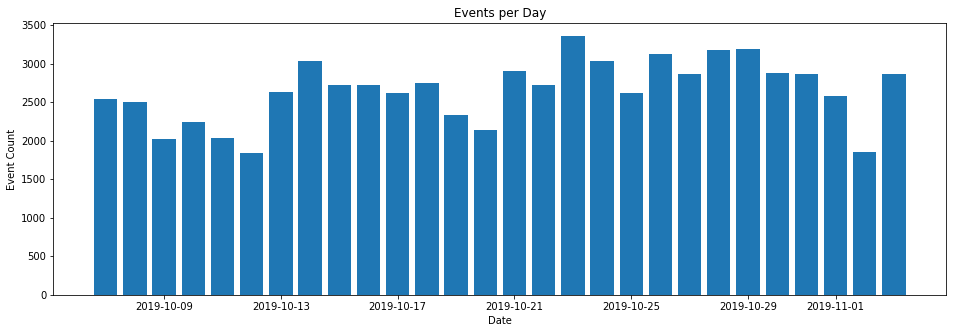

In [16]:
#Groupby dataset to count the events per day
event_per_day= dataset.groupby('date').agg({'event_name':'count'}).reset_index()

#Bar distribution of the events per day 
plt.figure(figsize=(16,5))
plt.title('Events per Day')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.bar(event_per_day['date'], event_per_day['event_name']);

Usage of the app varied per day with spikes of activity.

<div class="alert alert-block alert-success">
Ok, agreed.
</div>

In [17]:
#Subset of data to see contacts_show 
contact = dataset.query('event_name == "contacts_show"')
contact

,event_time,event_name,user_id,date
24,2019-10-07 00:05:16.003328,contacts_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,2019-10-07
70,2019-10-07 00:18:53.427525,contacts_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,2019-10-07
195,2019-10-07 08:11:07.995945,contacts_show,48e614d6-fe03-40f7-bf9e-4c4f61c19f64,2019-10-07
244,2019-10-07 09:33:19.822541,contacts_show,9dfa242e-8630-480a-806b-5736bcda8f3d,2019-10-07
327,2019-10-07 10:19:49.080484,contacts_show,1a3361d1-2002-4389-a669-ecb06ea7a90a,2019-10-07
...,...,...,...,...
74156,2019-11-03 23:37:32.236349,contacts_show,ec70be94-3ea7-4ac2-90fb-da1a044d7e30,2019-11-03
74161,2019-11-03 23:42:19.043870,contacts_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03
74165,2019-11-03 23:44:12.901643,contacts_show,a0944ccf-5813-427a-966e-b146d4e9adbc,2019-11-03
74168,2019-11-03 23:44:31.063585,contacts_show,a0944ccf-5813-427a-966e-b146d4e9adbc,2019-11-03


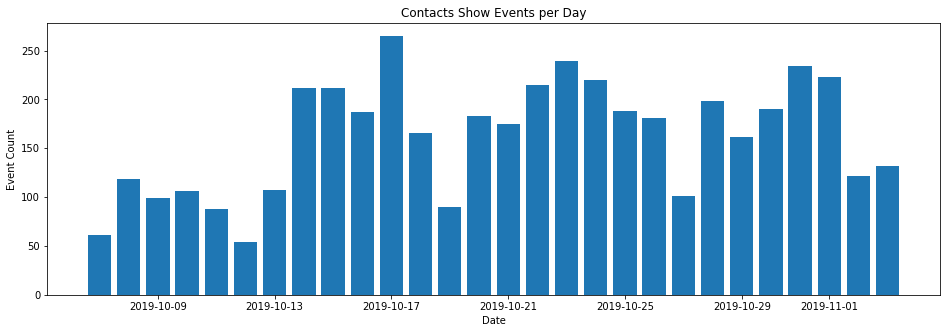

In [18]:
#Groupby contact to count the events per day
event_per_day= contact.groupby('date').agg({'event_name':'count'}).reset_index()

#Bar distribution of the events per day for contacts_show
plt.figure(figsize=(16,5))
plt.title('Contacts Show Events per Day')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.bar(event_per_day['date'], event_per_day['event_name']);

When the dataset is filtered for users who only interacted with contacts_show, the usage varied per day.

<div class="alert alert-block alert-success">
LGTM.
</div>

**For the mobile_sources_us.csv dataset, check the source count to see which ones the users prefer.**

In [19]:
sources['source'].value_counts()

bing      1934
other     1230
google    1129
Name: source, dtype: int64

Users prefer using Bing over other options, Google was used the least.

**Merge the two datasets to see the relationship between the source count and event.time**

In [20]:
joined_data = pd.merge(dataset, sources, on='user_id')
joined_data

,event_time,event_name,user_id,date,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
...,...,...,...,...,...
74192,2019-11-03 23:46:47.068179,map,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,google
74193,2019-11-03 23:46:58.914787,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,google
74194,2019-11-03 23:47:01.232230,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,google
74195,2019-11-03 23:47:47.475102,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,google


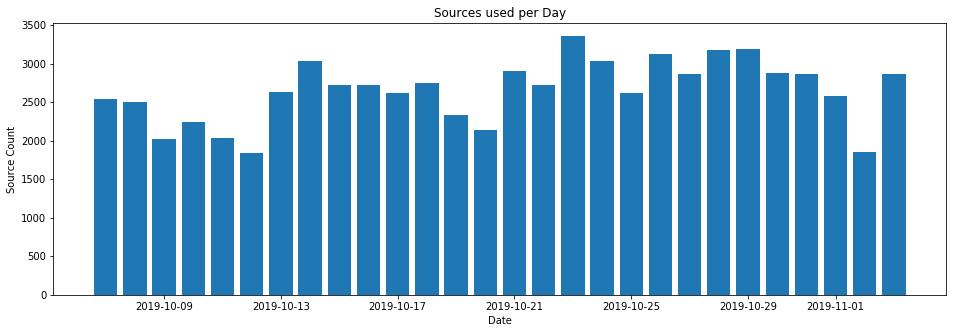

In [21]:
#Groupby contact to count the events per day
source_per_day= joined_data.groupby('date').agg({'source':'count'}).reset_index()

#Bar distribution of the events per day for group a
plt.figure(figsize=(16,5))
plt.title('Sources used per Day')
plt.xlabel('Date')
plt.ylabel('Source Count')
plt.bar(source_per_day['date'], source_per_day['source']);

The data trend for the sources used per day is very similar to the events done per day.

<div class="alert alert-block alert-danger">
Please make a stack bar plot for we could see share of every resource.
</div>

# Test Statistical Analysis

Form an a/b hypothesis to see if there is a difference in conversion into contact info views between users who complete tips_show and tips_click event and the users who only complete tips_show events.

In [22]:
#Create a dataframe by using groupby
users_and_events = pd.DataFrame(dataset.groupby('user_id')['event_name'].apply(list))

#Create t/f columns to check if tips_show, tips_click, or contacts_show is in
users_and_events['tips_show_is_in'] = users_and_events['event_name'].apply(lambda x: 'tips_show' in x)
users_and_events['tips_click_is_in'] = users_and_events['event_name'].apply(lambda x: 'tips_click' in x)
users_and_events['contacts_show_is_in'] = users_and_events['event_name'].apply(lambda x: 'contacts_show' in x)

users_and_events

,event_name,tips_show_is_in,tips_click_is_in,contacts_show_is_in
user_id,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,"[tips_show, tips_show, tips_show, tips_show, t...",True,False,False
00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, search_1, search_1, photos_show, ph...",False,False,True
00463033-5717-4bf1-91b4-09183923b9df,"[photos_show, photos_show, photos_show, photos...",False,False,False
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,"[search_7, search_5, map, search_7, search_4, ...",True,False,False
00551e79-152e-4441-9cf7-565d7eb04090,"[contacts_show, contacts_call, search_1, conta...",False,False,True
...,...,...,...,...
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,"[map, tips_show, tips_show, tips_show, tips_sh...",True,False,False
ffc01466-fdb1-4460-ae94-e800f52eb136,"[photos_show, photos_show, photos_show, photos...",False,False,True
ffcf50d9-293c-4254-8243-4890b030b238,"[tips_show, map]",True,False,False


In [23]:
#Create a t/f column with both tips_show and tips_click is in
users_and_events['both_tips'] = users_and_events.apply(lambda row: row['tips_show_is_in'] and row['tips_click_is_in'],
                                                                    axis = 1)
users_and_events

,event_name,tips_show_is_in,tips_click_is_in,contacts_show_is_in,both_tips
user_id,,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,"[tips_show, tips_show, tips_show, tips_show, t...",True,False,False,False
00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, search_1, search_1, photos_show, ph...",False,False,True,False
00463033-5717-4bf1-91b4-09183923b9df,"[photos_show, photos_show, photos_show, photos...",False,False,False,False
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,"[search_7, search_5, map, search_7, search_4, ...",True,False,False,False
00551e79-152e-4441-9cf7-565d7eb04090,"[contacts_show, contacts_call, search_1, conta...",False,False,True,False
...,...,...,...,...,...
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,"[map, tips_show, tips_show, tips_show, tips_sh...",True,False,False,False
ffc01466-fdb1-4460-ae94-e800f52eb136,"[photos_show, photos_show, photos_show, photos...",False,False,True,False
ffcf50d9-293c-4254-8243-4890b030b238,"[tips_show, map]",True,False,False,False


In [24]:
#Create a t/f column with only tips_show is in
users_and_events['only_tips_show'] = users_and_events.apply(lambda row: row['tips_show_is_in'] and not row['tips_click_is_in'],
                                                                    axis = 1)
users_and_events

,event_name,tips_show_is_in,tips_click_is_in,contacts_show_is_in,both_tips,only_tips_show
user_id,,,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,"[tips_show, tips_show, tips_show, tips_show, t...",True,False,False,False,True
00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, search_1, search_1, photos_show, ph...",False,False,True,False,False
00463033-5717-4bf1-91b4-09183923b9df,"[photos_show, photos_show, photos_show, photos...",False,False,False,False,False
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,"[search_7, search_5, map, search_7, search_4, ...",True,False,False,False,True
00551e79-152e-4441-9cf7-565d7eb04090,"[contacts_show, contacts_call, search_1, conta...",False,False,True,False,False
...,...,...,...,...,...,...
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,"[map, tips_show, tips_show, tips_show, tips_sh...",True,False,False,False,True
ffc01466-fdb1-4460-ae94-e800f52eb136,"[photos_show, photos_show, photos_show, photos...",False,False,True,False,False
ffcf50d9-293c-4254-8243-4890b030b238,"[tips_show, map]",True,False,False,False,True


In [25]:
#Conversion rate for only_tips_show into contacts_show
users_and_events[users_and_events['only_tips_show']]['contacts_show_is_in'].mean()

0.16972843450479233

In [26]:
#Conversion rate for both_tips into contacts_show
users_and_events[users_and_events['both_tips']]['contacts_show_is_in'].mean()

0.3063973063973064

Comparing the conversion rates between users who completed both_tips and users who did only_tips_show seems to indicate the both_tips give a higher conversion rate.

<div class="alert alert-block alert-success">
Looks good to me. Let's see what the testing hypotheses brings us.
</div>

**Use various statistical significances to see of the difference between the tests.**

H0: users who complete both tips_show and tips_click vs users who only complete tips_show have a similar conversion into contact_show

H1: users who complete both tips_show and tips_click vs users who only complete tips_show don't have a similar conversion into contact_show

In [27]:
users_and_events['only_tips_show_to_contact'] = users_and_events.apply(lambda row: row['tips_show_is_in']
                                                            and not row['tips_click_is_in']
                                                            and row['contacts_show_is_in'],
                                                                    axis = 1)

users_and_events['both_tips_show_to_contact'] = users_and_events.apply(lambda row: row['tips_show_is_in']
                                                            and row['tips_click_is_in']
                                                            and row['contacts_show_is_in'],
                                                                    axis = 1)

users_and_events.head()

,event_name,tips_show_is_in,tips_click_is_in,contacts_show_is_in,both_tips,only_tips_show,only_tips_show_to_contact,both_tips_show_to_contact
user_id,,,,,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,"[tips_show, tips_show, tips_show, tips_show, t...",True,False,False,False,True,False,False
00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, search_1, search_1, photos_show, ph...",False,False,True,False,False,False,False
00463033-5717-4bf1-91b4-09183923b9df,"[photos_show, photos_show, photos_show, photos...",False,False,False,False,False,False,False
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,"[search_7, search_5, map, search_7, search_4, ...",True,False,False,False,True,False,False
00551e79-152e-4441-9cf7-565d7eb04090,"[contacts_show, contacts_call, search_1, conta...",False,False,True,False,False,False,False


In [28]:
#Convert T/F into 1s as T and 0s as F for statistical analysis
users_and_events['b_only_tips_show_to_contact'] = users_and_events['only_tips_show_to_contact'].astype('int')
users_and_events['b_both_tips_show_to_contact'] = users_and_events['both_tips_show_to_contact'].astype('int')

users_and_events.head()

,event_name,tips_show_is_in,tips_click_is_in,contacts_show_is_in,both_tips,only_tips_show,only_tips_show_to_contact,both_tips_show_to_contact,b_only_tips_show_to_contact,b_both_tips_show_to_contact
user_id,,,,,,,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,"[tips_show, tips_show, tips_show, tips_show, t...",True,False,False,False,True,False,False,0,0
00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, search_1, search_1, photos_show, ph...",False,False,True,False,False,False,False,0,0
00463033-5717-4bf1-91b4-09183923b9df,"[photos_show, photos_show, photos_show, photos...",False,False,False,False,False,False,False,0,0
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,"[search_7, search_5, map, search_7, search_4, ...",True,False,False,False,True,False,False,0,0
00551e79-152e-4441-9cf7-565d7eb04090,"[contacts_show, contacts_call, search_1, conta...",False,False,True,False,False,False,False,0,0


In [29]:
p_value = statsmodels.stats.weightstats.ztest(users_and_events['b_only_tips_show_to_contact'],
                                    users_and_events['b_both_tips_show_to_contact'])[1]
alpha = 0.05
print('p-value: ', p_value)

if (p_value < alpha):
    print("Reject H0")
else:
    print("Fail to Reject H0") 

p-value:  2.5281148829043343e-53
Reject H0


The z-test indicates that there is a statistical difference between the users who use only_tips_show and both_tips. 

<div class="alert alert-block alert-success">
Looks good.
</div>

# General Conclusion

Opening dataset and sources showed that they were mostly complete, only needed some data conversion and name changes to allow for easier analysis. 

The users who did the various events did them shared a similar trend with users who used search engines to download the app. Events per day done for only contacts_show did differ compared to events overall.

Analyzing the ztest and comparing the conversion rates for users who use both tip event and users who only use tips_show reveal that using both tip events lead to more contact_show events. 

I would suggest to further improve on the tips_show and tips_click events since they lead to higher contact_show.

# Final Project Presentation pdf

https://drive.google.com/file/d/1uJ3zNc7kIrQnc5yDVGVvSXmZO2ZA0FLT/view?usp=sharing

<div class="alert alert-block alert-danger">
Please make a stack bar plot for "Sources Used per Day" chart in the presentation.
</div>